In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


(256, 256) 65536 uint8 <class 'numpy.ndarray'>
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


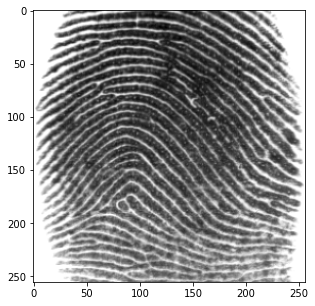

(256, 256) 65536 float64 <class 'numpy.ndarray'>
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


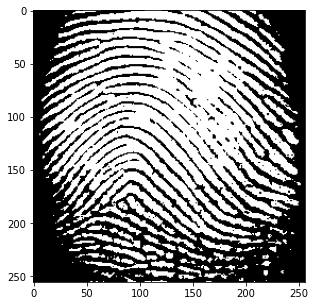

In [9]:
import matplotlib.image as mpimg
import matplotlib.pylab as plt
import numpy as np

img = mpimg.imread('/gdrive/My Drive/ColabNote/images/001_00.tif')

print(img.shape, img.size, img.dtype, type(img))
print(img)

plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.gray()
plt.axis('on')
plt.show()

img_bin = np.zeros((256, 256))
img_bin[img <128] = 1
img_bin[img >=128] = 0

print(img_bin.shape, img_bin.size, img_bin.dtype, type(img_bin))
print(img_bin)

plt.figure(figsize=(5, 5))
plt.imshow(img_bin)
plt.axis('on')
plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


(<matplotlib.image.AxesImage at 0x7f65fe0e4fd0>, Text(0.5, 1.0, 'skeleton'))

<Figure size 432x288 with 0 Axes>

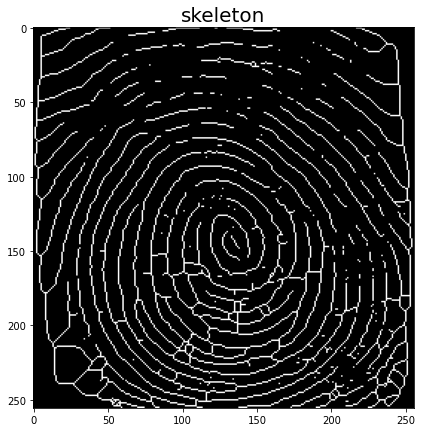

In [30]:
from skimage.morphology import skeletonize
from skimage.io import imread
import matplotlib.pylab as pylab


img1 = img_as_float(imread('/gdrive/My Drive/ColabNote/images/002_00.tif'))
threshold = 0.5
img1[img1 <= threshold] = 0
img1[img1 > threshold] = 1
skeleton = skeletonize(img1)

pylab.gray()
pylab.figure(figsize = (18, 7))
pylab.subplot(1, 2, 1), pylab.axis('on')
pylab.imshow(img1), pylab.title('original', size=20)

pylab.subplot(1, 2, 1), pylab.axis('on')
pylab.imshow(skeleton), pylab.title('skeleton', size=20)

(<matplotlib.image.AxesImage at 0x7f65fdeda1d0>,
 Text(0.5, 1.0, 'opening and closing with disk size 12'))

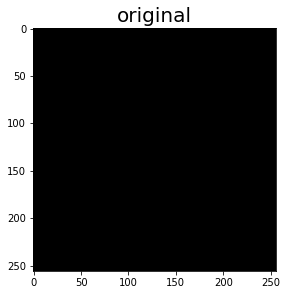

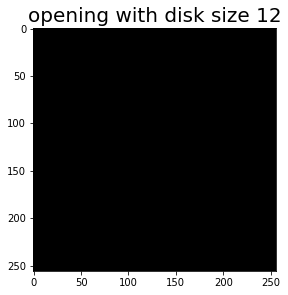

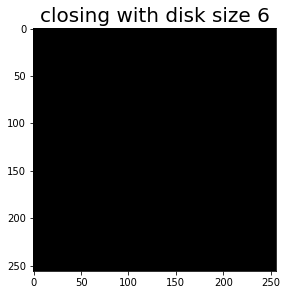

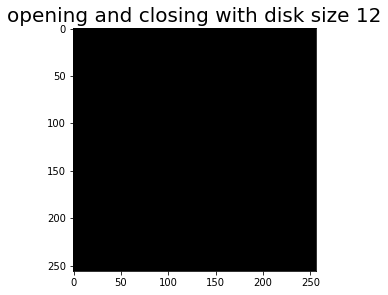

In [39]:
from skimage.morphology import binary_opening, binary_closing, disk
from skimage.color import rgb2gray
from skimage.io import imread
import matplotlib.pylab as pylab

img2 = rgb2gray(imread('/gdrive/My Drive/ColabNote/images/001_00.tif'))
img2[img2 <= 0.5] = 0
img2[img2 > 0.5] = 1
img2_1 = binary_opening(img2, disk(1))
img2_2 = binary_closing(img2, disk(1))

pylab.figure(figsize = (20, 10)), pylab.gray()
pylab.subplot(1, 4, 1), pylab.axis('on')
pylab.imshow(img2), pylab.title('original', size=20)

pylab.figure(figsize = (20, 10)), pylab.gray()
pylab.subplot(1, 4, 2), pylab.axis('on')
pylab.imshow(img2_1), pylab.title('opening with disk size '+ str(12), size=20)

pylab.figure(figsize = (20, 10)), pylab.gray()
pylab.subplot(1, 4, 3), pylab.axis('on')
pylab.imshow(img2_2), pylab.title('closing with disk size '+ str(6), size=20)

#열고 다시 닫기
img2_3 = binary_closing(img2_1, disk(12))

pylab.figure(figsize = (20, 10)), pylab.gray()
pylab.subplot(1, 4, 4), pylab.axis('on')
pylab.imshow(img2_3), pylab.title('opening and closing with disk size '+ str(12), size=20)